In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt


In [7]:
device = torch.device("cpu")
print(f"Using device: {device}")

def get_model(name):
    if name == "squeezenet":
        model = models.squeezenet1_0(weights=None)  
        model.classifier[1] = nn.Conv2d(512, 10, kernel_size=(1, 1)) 
        model.num_classes = 10
    elif name == "mobilenet":
        model = models.mobilenet_v2(weights=None) 
        model.classifier[1] = nn.Linear(model.last_channel, 10)  
    elif name == "resnet18":
        model = models.resnet18(weights=None)
        model.fc = nn.Linear(model.fc.in_features, 10) 
    elif name == "alexnet":
        model = models.alexnet(weights=None)  
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, 10) 
    else:
        raise ValueError("Unknown model name")
    
    return model.to(device)

Using device: cpu


In [8]:
batch_size = 32
learning_rate = 0.001
epochs = 8


In [4]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


100%|██████████| 170498071/170498071 [00:14<00:00, 12172660.15it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
def get_model(name):
    if name == "squeezenet":
        model = models.squeezenet1_0(weights=None)  
        model.classifier[1] = nn.Conv2d(512, 10, kernel_size=(1, 1)) 
        model.num_classes = 10
    elif name == "mobilenet":
        model = models.mobilenet_v2(weights=None)
        model.classifier[1] = nn.Linear(model.last_channel, 10)
    else:
        raise ValueError("Unknown model name")
    return model.to(device)

model_name = "squeezenet"  
model = get_model(model_name)


In [6]:
def train(model, loader, optimizer, criterion):
    model.train()
    running_loss, correct = 0.0, 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        _, preds = outputs.max(1)
        correct += preds.eq(labels).sum().item()
    return running_loss / len(loader.dataset), correct / len(loader.dataset)

def evaluate(model, loader, criterion):
    model.eval()
    running_loss, correct = 0.0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, preds = outputs.max(1)
            correct += preds.eq(labels).sum().item()
    return running_loss / len(loader.dataset), correct / len(loader.dataset)
epochs = 8  # Set epochs to 8
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss {train_loss:.4f}, Train Acc {train_acc:.4f}, "
          f"Val Loss {val_loss:.4f}, Val Acc {val_acc:.4f}")


Epoch 1: Train Loss 2.3024, Train Acc 0.0998, Val Loss 2.3026, Val Acc 0.1033
Epoch 2: Train Loss 2.3026, Train Acc 0.0992, Val Loss 2.3026, Val Acc 0.1033
Epoch 3: Train Loss 2.3026, Train Acc 0.0992, Val Loss 2.3026, Val Acc 0.1033
Epoch 4: Train Loss 2.3026, Train Acc 0.0992, Val Loss 2.3026, Val Acc 0.1033
Epoch 5: Train Loss 2.3026, Train Acc 0.0992, Val Loss 2.3026, Val Acc 0.1033
Epoch 6: Train Loss 2.3026, Train Acc 0.0992, Val Loss 2.3026, Val Acc 0.1033
Epoch 7: Train Loss 2.3026, Train Acc 0.0992, Val Loss 2.3026, Val Acc 0.1033
Epoch 8: Train Loss 2.3026, Train Acc 0.0992, Val Loss 2.3026, Val Acc 0.1033


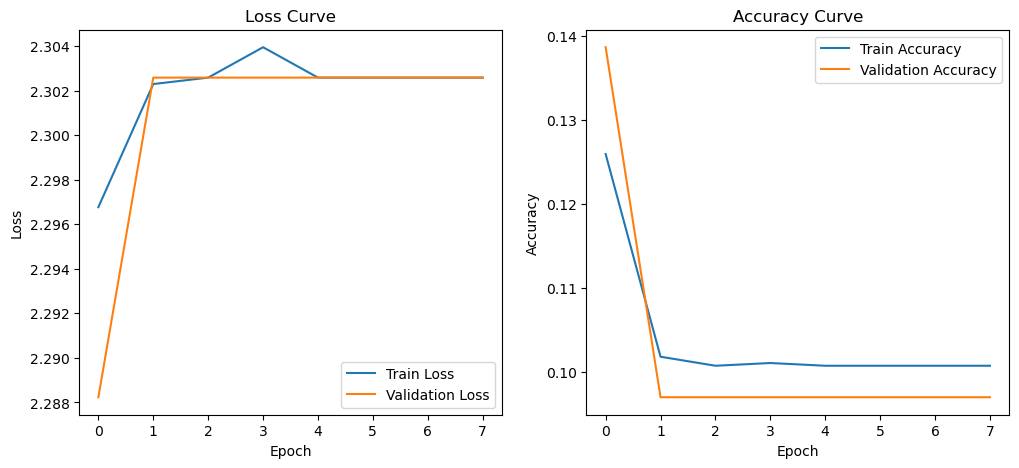

Test Loss: 2.3026, Test Accuracy: 0.1000


In [12]:
def plot_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = len(train_losses)
    plt.figure(figsize=(12, 5))

  
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), train_losses, label='Train Loss')
    plt.plot(range(epochs), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curve')

 
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), train_accuracies, label='Train Accuracy')
    plt.plot(range(epochs), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Curve')

    plt.show()

plot_curves(train_losses, val_losses, train_accuracies, val_accuracies)

test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


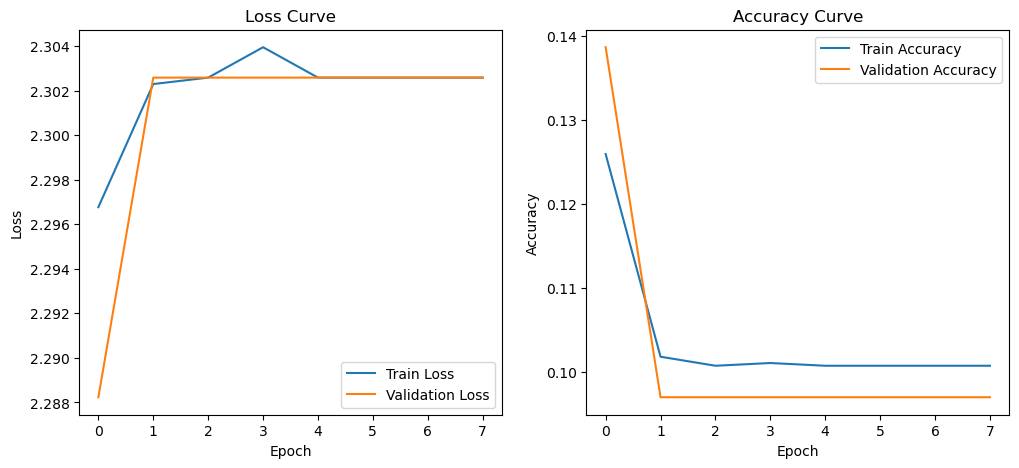

Test Loss: 2.3026, Test Accuracy: 0.1000


In [12]:
def plot_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = len(train_losses)
    plt.figure(figsize=(12, 5))

    
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), train_losses, label='Train Loss')
    plt.plot(range(epochs), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curve')

 
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), train_accuracies, label='Train Accuracy')
    plt.plot(range(epochs), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Curve')

    plt.show()

plot_curves(train_losses, val_losses, train_accuracies, val_accuracies)

test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


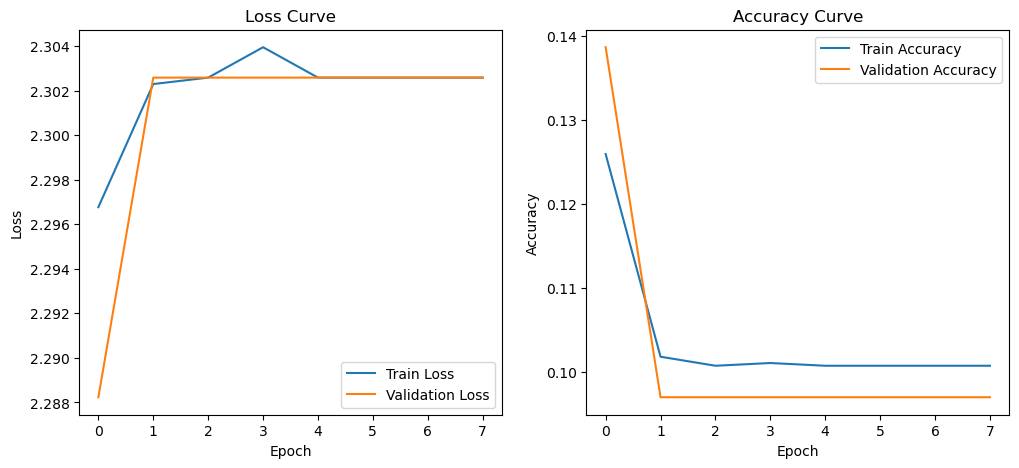

Test Loss: 2.3026, Test Accuracy: 0.1000


In [12]:
def plot_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = len(train_losses)
    plt.figure(figsize=(12, 5))

    
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), train_losses, label='Train Loss')
    plt.plot(range(epochs), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curve')

    
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), train_accuracies, label='Train Accuracy')
    plt.plot(range(epochs), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Curve')

    plt.show()

plot_curves(train_losses, val_losses, train_accuracies, val_accuracies)

test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


Training model: resnet18
Epoch 1: Train Loss 1.4682, Train Acc 0.4734, Val Loss 1.2389, Val Acc 0.5686
Epoch 2: Train Loss 1.0955, Train Acc 0.6179, Val Loss 0.9498, Val Acc 0.6671
Epoch 3: Train Loss 0.9204, Train Acc 0.6819, Val Loss 0.8913, Val Acc 0.6878
Epoch 4: Train Loss 0.8168, Train Acc 0.7174, Val Loss 0.8468, Val Acc 0.7096
Epoch 5: Train Loss 0.7285, Train Acc 0.7518, Val Loss 0.7758, Val Acc 0.7322
Epoch 6: Train Loss 0.6598, Train Acc 0.7731, Val Loss 0.7539, Val Acc 0.7418
Epoch 7: Train Loss 0.5959, Train Acc 0.7973, Val Loss 0.6705, Val Acc 0.7742
Epoch 8: Train Loss 0.5371, Train Acc 0.8149, Val Loss 0.6703, Val Acc 0.7680


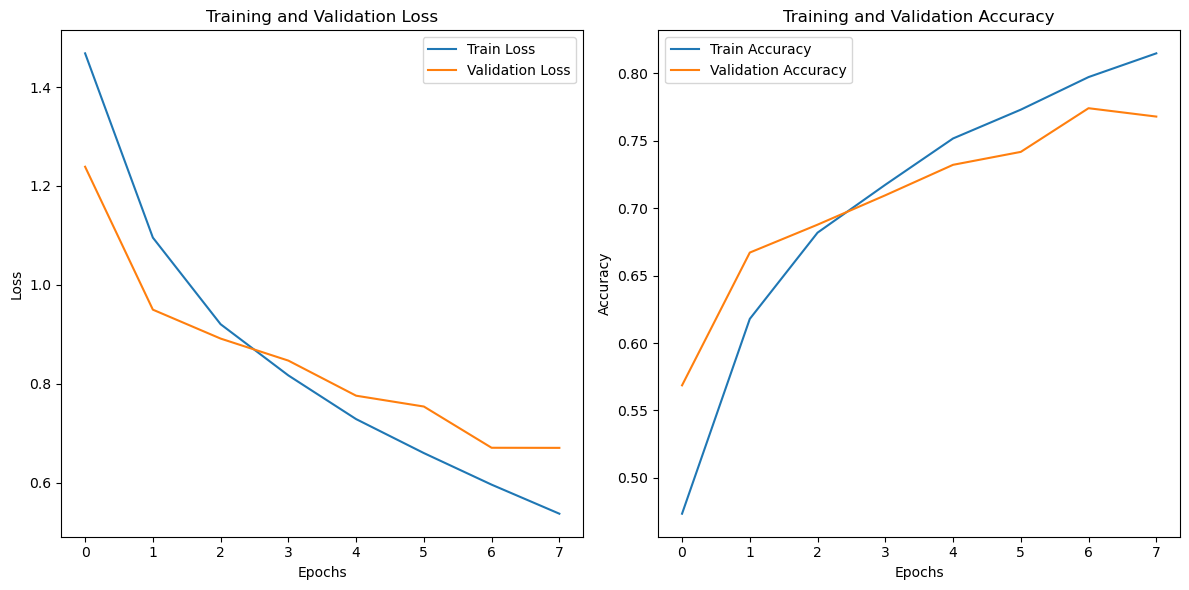

Training model: mobilenet
Epoch 1: Train Loss 1.9311, Train Acc 0.2908, Val Loss 1.6348, Val Acc 0.3955
Epoch 2: Train Loss 1.6036, Train Acc 0.4221, Val Loss 1.4543, Val Acc 0.4706
Epoch 3: Train Loss 1.4418, Train Acc 0.4848, Val Loss 1.3056, Val Acc 0.5394
Epoch 4: Train Loss 1.3075, Train Acc 0.5407, Val Loss 1.2099, Val Acc 0.5792
Epoch 5: Train Loss 1.2052, Train Acc 0.5791, Val Loss 1.1664, Val Acc 0.5846
Epoch 6: Train Loss 1.1264, Train Acc 0.6079, Val Loss 1.0379, Val Acc 0.6348
Epoch 7: Train Loss 1.0361, Train Acc 0.6399, Val Loss 0.9796, Val Acc 0.6643
Epoch 8: Train Loss 0.9707, Train Acc 0.6647, Val Loss 0.9487, Val Acc 0.6631


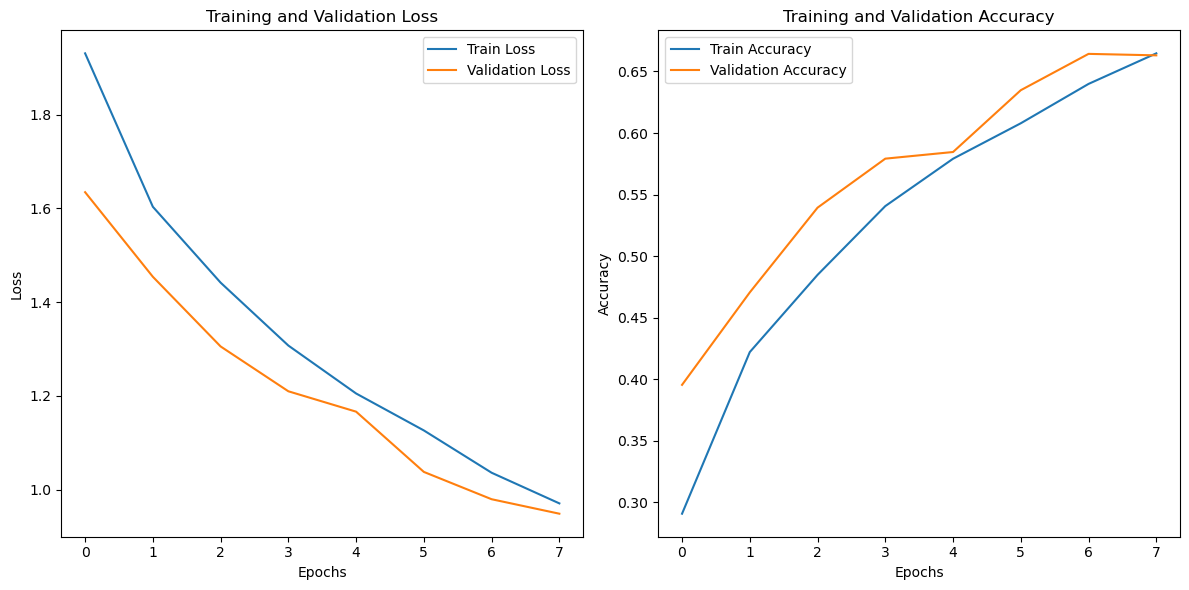

Training model: alexnet


RuntimeError: Given input size: (256x1x1). Calculated output size: (256x0x0). Output size is too small

In [10]:
import matplotlib.pyplot as plt

def plot_curves(train_losses, val_losses, train_accuracies, val_accuracies):
   
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

   
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(val_accuracies, label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()


    plt.tight_layout()
    plt.show()

models_to_train = ["resnet18", "mobilenet", "alexnet"]
results = {}

for model_name in models_to_train:
    print(f"Training model: {model_name}")
    model = get_model(model_name)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        train_loss, train_acc = train(model, train_loader, optimizer, criterion)
        val_loss, val_acc = evaluate(model, val_loader, criterion)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}: Train Loss {train_loss:.4f}, Train Acc {train_acc:.4f}, "
              f"Val Loss {val_loss:.4f}, Val Acc {val_acc:.4f}")

    results[model_name] = (train_losses, val_losses, train_accuracies, vauracies)
    plot_curves(train_losses, val_losses, train_accuracies, val_accuracies)
l_acc

In [11]:
for model_name in models_to_train:
    print(f"Testing model: {model_name}")
    model = get_model(model_name)
    test_loss, test_acc = evaluate(model, test_loader, criterion)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


Testing model: resnet18
Test Loss: 2.3219, Test Accuracy: 0.1001
Testing model: mobilenet
Test Loss: 2.3027, Test Accuracy: 0.1000
Testing model: alexnet


RuntimeError: Given input size: (256x1x1). Calculated output size: (256x0x0). Output size is too small